In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [13]:
df=pd.read_csv("Student_Marks (2).csv")
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [14]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i]) 
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [15]:
x=df.drop("Marks",axis=1)
y=df["Marks"]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
y_pred=model.predict(x_test)
y_pred

array([16.44918, 35.56641, 16.92413, 10.42055, 11.0462 , 50.95797,
       12.55124, 52.14082, 43.89374, 20.07702, 50.99347, 22.3653 ,
        7.59664, 40.89446, 23.16644, 52.75318, 38.48433, 36.21883,
       22.96653, 10.07079])

In [19]:
r_score=r2_score(y_pred,y_test)
r_score


0.991800733442204

In [20]:
mse=mean_squared_error(y_pred,y_test)
print(mse)
rmsc=np.sqrt(mse)
rmsc

1.9944720109850334


np.float64(1.4122577707292083)

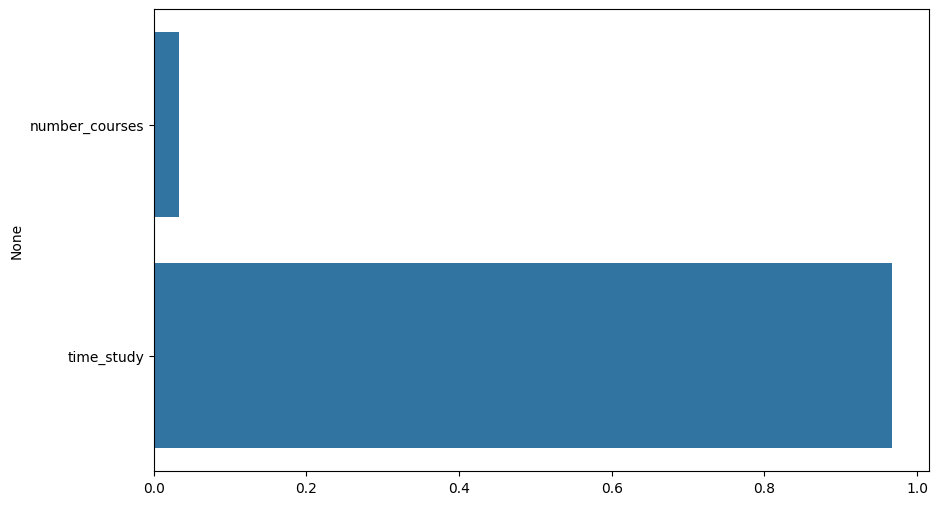

In [21]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [22]:
new_data=pd.DataFrame({
    "number_courses":[4],
    "time_study":[3.133]
    })
predict=model.predict(new_data)
predict

array([14.09507])